In [21]:
img_path='/content/drive/MyDrive/images.png'

In [22]:
ht=450
wdth=450

In [23]:
import cv2 as cv
import numpy as np

In [24]:
img=cv.imread(img_path)
img=cv.resize(img,(ht,wdth))


In [25]:
def preprocess(img):
  img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  img_blur=cv.GaussianBlur(img,(5,5),1)
  img_thresh=cv.adaptiveThreshold(img_blur,255,1,1,11,2)
  return img_thresh

In [26]:
img_thresh=preprocess(img)

In [27]:
!pip install google-colab
from google.colab.patches import cv2_imshow
import cv2 as cv

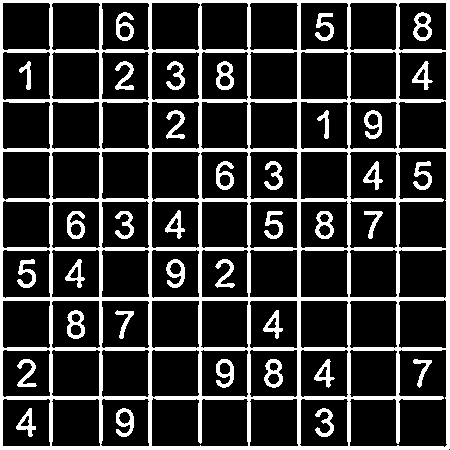

In [28]:
cv2_imshow(img_thresh)

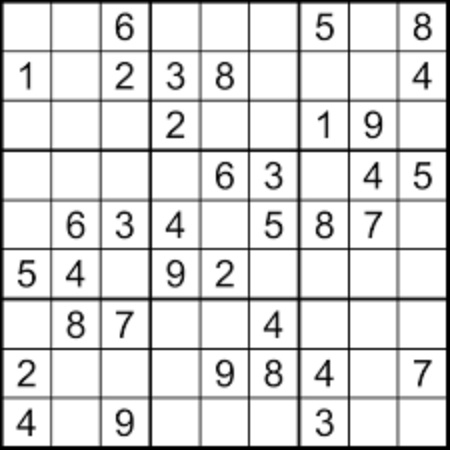

In [29]:
cv2_imshow(img)

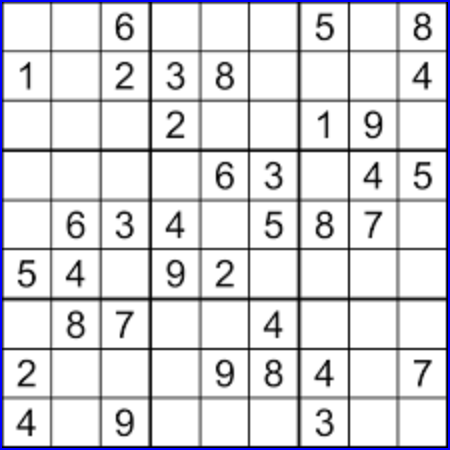

In [30]:
img_cont=img.copy()
img_biggest_cont=img.copy()
contours,heirarchy=cv.findContours(img_thresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_cont,contours,-1,(255,0,0),2)
cv2_imshow(img_cont)

In [31]:
def big_cont(contours):
  biggest=np.array([])
  max_area=0
  for i in contours:
    area=cv.contourArea(i)
    if(area>20):
      peri=cv.arcLength(i,True)
      approx=cv.approxPolyDP(i,0.02*peri,True)
      if area>max_area and len(approx)==4:
        biggest=approx
        max_area=area
  return biggest,max_area

In [32]:
biggest,max_area=big_cont(contours)

In [33]:
print (biggest)

[[[  0   0]]

 [[  0 449]]

 [[448 449]]

 [[449   0]]]


In [34]:
def reorder(myPoints):
    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] =myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] =myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
    return myPointsNew

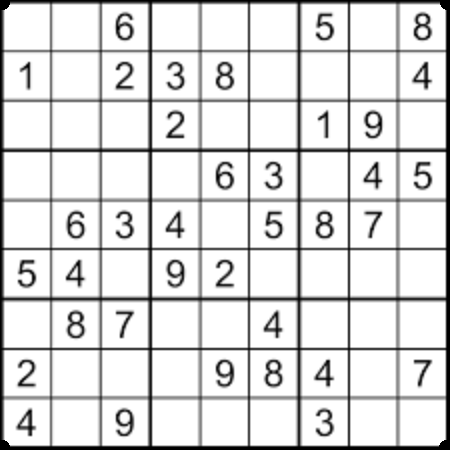

In [35]:
if biggest.size!=0:
  biggest=reorder(biggest)
  cv.drawContours(img_biggest_cont,biggest,-1,(0,0,0),20)
  cv2_imshow(img_biggest_cont)


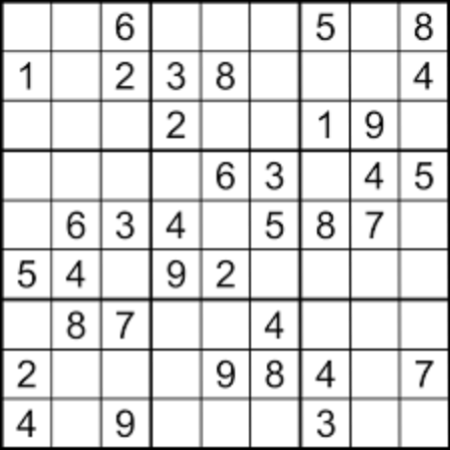

In [36]:
pts1=np.float32(biggest)
pts2=np.float32([[0,0],[wdth,0],[0,ht],[wdth,ht]])
matrix=cv.getPerspectiveTransform(pts1,pts2)
img_warp=cv.warpPerspective(img,matrix,(wdth,ht))
img_warp = cv.cvtColor(img_warp, cv.COLOR_BGR2GRAY)
cv2_imshow(img_warp)


In [37]:
def split_into_boxes(img):
    rows = np.vsplit(img,9)
    boxes=[]
    for r in rows:
        cols= np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes

In [38]:
img_solved=img.copy()
boxes=split_into_boxes(img_warp)
len(boxes)


81

array([[ 36, 100, 139, ...,  98,  78,  78],
       [ 39, 108, 151, ..., 107,  87,  87],
       [ 53, 146, 205, ..., 152, 124, 125],
       ...,
       [ 54, 139, 204, ..., 160, 129, 127],
       [ 30,  77, 113, ...,  85,  66,  66],
       [ 21,  55,  79, ...,  57,  42,  43]], dtype=uint8)
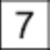

In [47]:
boxes[43]

In [40]:
boxes[1]